This is a retail project where our challenge is to predict whether a retail store should get opened or not based on certain factors such as sales, population,area etc. We have been given two datasets store_train.csv and store_test.csv .We need to use data store_train to build predictive model for response variable ‘store’. store_test data contains all other factors except ‘store’, we need to predict that using the model that we will develop. We will be submitting our predicted values in terms of probability scores. This is a typical classification problem & we will use random forest for model building.

Let’s start loading our files first.

In [33]:
s_train=read.csv("../input/store_train.csv",stringsAsFactors = F)
s_test=read.csv("../input/store_test.csv",stringsAsFactors = F)

Let us load data wrangling library dplyr so as to glimpse our data.

In [34]:
library(dplyr)

In [35]:
glimpse(s_train)

Observations: 3,338
Variables: 17
$ Id             <dbl> 2300919770, 5000129575, 2501308470, 603599999, 5002760…
$ sales0         <int> 848, 925, 924, 924, 1017, 1494, 691, 918, 931, 584, 69…
$ sales1         <int> 588, 717, 616, 646, 730, 1071, 476, 663, 628, 455, 425…
$ sales2         <int> 666, 780, 739, 683, 735, 1196, 541, 774, 775, 477, 538…
$ sales3         <int> 1116, 1283, 1154, 1292, 1208, 1861, 861, 1189, 1228, 7…
$ sales4         <int> 1133, 1550, 1314, 1297, 1326, 2023, 923, 1477, 1502, 9…
$ country        <int> 9, 1, 13, 35, 27, 9, 103, 183, 89, 57, 3, 109, 73, 11,…
$ State          <int> 23, 50, 25, 6, 50, 25, 26, 37, 12, 5, 53, 28, 31, 12, …
$ CouSub         <int> 19770, 29575, 8470, 99999, 60100, 37995, 99999, 99999,…
$ countyname     <chr> "Hancock County", "Addison County", "Hampden County", …
$ storecode      <chr> "NCNTY23009N23009", "NCNTY50001N50001", "METRO44140M44…
$ Areaname       <chr> "Hancock County, ME", "Addison County, VT", "Springfie…
$ countytownname <

In [36]:
glimpse(s_test)

Observations: 1,431
Variables: 16
$ Id             <dbl> 101799999, 101999999, 102199999, 103599999, 103799999,…
$ sales0         <int> 696, 599, 599, 599, 599, 599, 788, 599, 757, 599, 773,…
$ sales1         <int> 511, 481, 423, 459, 481, 460, 628, 484, 450, 435, 545,…
$ sales2         <int> 514, 500, 475, 462, 505, 463, 663, 505, 572, 465, 652,…
$ sales3         <int> 867, 883, 802, 883, 746, 866, 1084, 746, 950, 883, 101…
$ sales4         <int> 1034, 894, 1061, 886, 801, 961, 1288, 870, 1079, 987, …
$ country        <int> 17, 19, 21, 35, 37, 39, 51, 53, 65, 67, 73, 83, 87, 10…
$ State          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ CouSub         <int> 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999…
$ countyname     <chr> "Chambers County", "Cherokee County", "Chilton County"…
$ storecode      <chr> "NCNTY01017N01017", "NCNTY01019N01019", "METRO13820N01…
$ Areaname       <chr> "Chambers County, AL", "Cherokee County, AL", "Chilton…
$ countytownname <

**Understanding Our Data **

Each row represnts characteristic of a single planned store.We can see from above that many categorical data has been coded to mask the data.Here is the interpretation for the columns Id : store id numeric sale figures for 5 types : sales0 sales1 sales2 sales3 sales4

country : categorical :: coded values for country

State : categorical :: coded values for State

CouSub : numeric ::subscription values at county level

countyname : Categorical ::county names

storecode : categorical :: store codes

Areaname : categorical :: name of the area , many times it matches with county name

countytownname : categorical :: county town name

population : numeric :: population of the store area

state_alpha : categorical :: short codes for state

store_Type : categorical :: type of store

store : categorical 1/0 : target indicator var 1=opened 0=not opened

**Data Preparation**

We’ll combine our two datasets so that we do not need to prepare data separately for them. And we’ll also avoid problem of dealing with different columns in different datasets. However before combining them, we’ll need to add response column to test because number of columns need to be same for two datasets to stack vertically.We are also going to add an identifier column ‘data’ which will recognize whether it is from train or test.

In [37]:
s_test$store=NA
s_train$data="train"
s_test$data="test"
s=rbind(s_train,s_test)

Let us glimpse our combined data sets s using glimpse & str function.

In [38]:
glimpse(s)

Observations: 4,769
Variables: 18
$ Id             <dbl> 2300919770, 5000129575, 2501308470, 603599999, 5002760…
$ sales0         <int> 848, 925, 924, 924, 1017, 1494, 691, 918, 931, 584, 69…
$ sales1         <int> 588, 717, 616, 646, 730, 1071, 476, 663, 628, 455, 425…
$ sales2         <int> 666, 780, 739, 683, 735, 1196, 541, 774, 775, 477, 538…
$ sales3         <int> 1116, 1283, 1154, 1292, 1208, 1861, 861, 1189, 1228, 7…
$ sales4         <int> 1133, 1550, 1314, 1297, 1326, 2023, 923, 1477, 1502, 9…
$ country        <int> 9, 1, 13, 35, 27, 9, 103, 183, 89, 57, 3, 109, 73, 11,…
$ State          <int> 23, 50, 25, 6, 50, 25, 26, 37, 12, 5, 53, 28, 31, 12, …
$ CouSub         <int> 19770, 29575, 8470, 99999, 60100, 37995, 99999, 99999,…
$ countyname     <chr> "Hancock County", "Addison County", "Hampden County", …
$ storecode      <chr> "NCNTY23009N23009", "NCNTY50001N50001", "METRO44140M44…
$ Areaname       <chr> "Hancock County, ME", "Addison County, VT", "Springfie…
$ countytownname <

In [39]:
str(s)

'data.frame':	4769 obs. of  18 variables:
 $ Id            : num  2.30e+09 5.00e+09 2.50e+09 6.04e+08 5.00e+09 ...
 $ sales0        : int  848 925 924 924 1017 1494 691 918 931 584 ...
 $ sales1        : int  588 717 616 646 730 1071 476 663 628 455 ...
 $ sales2        : int  666 780 739 683 735 1196 541 774 775 477 ...
 $ sales3        : int  1116 1283 1154 1292 1208 1861 861 1189 1228 727 ...
 $ sales4        : int  1133 1550 1314 1297 1326 2023 923 1477 1502 949 ...
 $ country       : int  9 1 13 35 27 9 103 183 89 57 ...
 $ State         : int  23 50 25 6 50 25 26 37 12 5 ...
 $ CouSub        : int  19770 29575 8470 99999 60100 37995 99999 99999 99999 99999 ...
 $ countyname    : chr  "Hancock County" "Addison County" "Hampden County" "Lassen County" ...
 $ storecode     : chr  "NCNTY23009N23009" "NCNTY50001N50001" "METRO44140M44140" "NCNTY06035N06035" ...
 $ Areaname      : chr  "Hancock County, ME" "Addison County, VT" "Springfield, MA HUD Metro FMR Area" "Lassen County, CA" ...

Many categorical data like ‘country’ & ‘State’ has already been coded to mask the data. We can see the same using frequency table as shown below.

In [40]:
table(s$country)


  1   3   5   6   7   9  10  11  12  13  14  15  16  17  19  20  21  23  25  27 
133 219 163   1 168 213   2 165   1 131   1 145   1 165 144   2 121 100 104 152 
 28  29  30  31  33  35  36  37  39  41  43  45  47  49  50  51  53  54  55  56 
  2  90   1  70  41  40   1  40  39  39  39  39  38  37   1  37  37   1  36   1 
 57  59  60  61  63  65  67  68  69  70  71  73  75  77  78  79  81  83  85  86 
 37  36   1  36  35  35  35   1  35   1  35  34  34  34   1  33  33  33  33   1 
 87  89  90  91  93  95  97  99 100 101 103 105 107 109 110 111 113 115 117 119 
 33  32   1  32  31  31  31  31   1  31  31  32  30  30   1  29  28  28  27  27 
121 122 123 125 127 129 130 131 133 135 137 139 141 143 145 147 149 150 151 153 
 27   1  26  26  25  23   1  23  23  21  21  20  20  19  19  19  19   1  17  18 
155 157 159 161 163 164 165 167 169 170 171 173 175 177 179 180 181 183 185 186 
 16  16  16  16  16   1  15  14  14   1  14  14  13  12  12   1  12  12  12   1 
187 188 189 191 193 195 197

In [41]:
table(s$State)


  1   2   4   5   6   8   9  10  11  12  13  15  16  17  18  19  20  21  22  23 
 67  29  15  75  58  64 169   3   1  67 159   5  44 102  92  99 105 120  64 535 
 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  44 
 25 351  83  87  82 116  56  93  17 259  21  33  62 100  53  88  77  36  67  39 
 45  46  47  48  49  50  51  53  54  55  56  66  72  78 
 46  66  95 254  29 255 135  39  55  72  23   1  78   3 

Since we will be using random forest we need to convert data type of response (which is store in this case) to factor type using function as.factor. This is how randomforest differentiates from regression & classification.If we need to build a regression model then response variable should be kept numeric else factor for classification.

In [42]:
s$store=as.factor(s$store)

Let us see if store column has been changed to factor type or not using glimpse function again from dplyr package.

In [43]:
glimpse(s)

Observations: 4,769
Variables: 18
$ Id             <dbl> 2300919770, 5000129575, 2501308470, 603599999, 5002760…
$ sales0         <int> 848, 925, 924, 924, 1017, 1494, 691, 918, 931, 584, 69…
$ sales1         <int> 588, 717, 616, 646, 730, 1071, 476, 663, 628, 455, 425…
$ sales2         <int> 666, 780, 739, 683, 735, 1196, 541, 774, 775, 477, 538…
$ sales3         <int> 1116, 1283, 1154, 1292, 1208, 1861, 861, 1189, 1228, 7…
$ sales4         <int> 1133, 1550, 1314, 1297, 1326, 2023, 923, 1477, 1502, 9…
$ country        <int> 9, 1, 13, 35, 27, 9, 103, 183, 89, 57, 3, 109, 73, 11,…
$ State          <int> 23, 50, 25, 6, 50, 25, 26, 37, 12, 5, 53, 28, 31, 12, …
$ CouSub         <int> 19770, 29575, 8470, 99999, 60100, 37995, 99999, 99999,…
$ countyname     <chr> "Hancock County", "Addison County", "Hampden County", …
$ storecode      <chr> "NCNTY23009N23009", "NCNTY50001N50001", "METRO44140M44…
$ Areaname       <chr> "Hancock County, ME", "Addison County, VT", "Springfie…
$ countytownname <

Next we will convert all categorical variables to dummies. We will write a function which will take care of that instead of converting them one by one.

In [44]:
CreateDummies=function(data,var,freq_cutoff=0){
t=table(data[,var])
t=t[t>freq_cutoff]
t=sort(t)
categories=names(t)[-1]
for( cat in categories){
name=paste(var,cat,sep="_")
name=gsub(" ","",name)
name=gsub("-","_",name)
name=gsub("\\?","Q",name)
name=gsub("<","LT_",name)
name=gsub("\\+","",name)
name=gsub("\\/","_",name)
name=gsub(">","GT_",name)
name=gsub("=","EQ_",name)
name=gsub(",","",name)
data[,name]=as.numeric(data[,var]==cat)
}
data[,var]=NULL
return(data)
}

Let me explain the function ‘CreateDummies’ we just created

t=table(data[,var]) this bit creates a frequency table for the given categorical column. t here is now simply a table which contains names as categories of the categorical variable and their frequency in the data.

t=t[t>freq_cutoff] this line of code removes those categories from the table which have frequencies below the frequency cutoff. ( this is a subjective choice)

‘t=sort(t)’ this line simple sorts the remaining table in ascending order

categories=names(t)[-1] since we sorted the table in ascending manner in the previous line, first category here has least count. In this line of code we are taking out the category names except the first one ( which has least count), thus making n-1 dummies from the remaining categories.

name=paste(var,cat,sep=“_“) all the dummy vars that we intend to make, need to have some name. this line of code creates that name by concatenating variable name with category name with an _.

name=gsub(" “,”“,name) subsequent lines like these using gsub are essentially cleaning up the name. Since we dont have any control over what the categories can be, we are removing special characters and spaces in the code in an automated fashion.

data[,name]=as.numeric(data[,var]==cat) once we have a cleaned up name, this line creates the dummy var for that particular category.

data[,var]=NULL once we are done creating dummies for the variable using for loop. Variable is removed from the data in this line.

Let us have a look at our categorical variables by writing following lines of codes

In [45]:
names(s)[sapply(s,function(x) is.character(x))]

[1] "countyname"     "storecode"      "Areaname"       "countytownname"
[5] "state_alpha"    "store_Type"     "data"

Now we will check for High-Cardinality in the categorical variables i.e we will check for variables with many distinct values. We will discard those variables from our modelling. Because including these attributes by standard dummy encoding increases the dimensionality of the data to such an extent that either the classification technique is unable to process them or if one would use some regularized linear technique that is able to cope with huge dimensions, it leads to a model with thousands or even millions of features, thereby losing the often required comprehensibility aspect.

In [46]:
length(unique(s$countyname))

[1] 1962

In [47]:
length(unique(s$storecode))

[1] 2572

In [48]:
length(unique(s$Areaname))

[1] 2572

In [49]:
length(unique(s$countytownname))

[1] 3176

In [50]:
length(unique(s$state_alpha))

[1] 54

In [51]:
length(unique(s$store_Type))

[1] 4

We will ignore columns or variables like countyname,storecode,Areaname,countytownname for their High-Cardinality. Further we will ignore data column for obvious reason.

In [52]:
s=s %>% select(-countyname,-storecode,-Areaname,-countytownname)

Above codes will discard those four variables & we are left with 14 variables now. Next Let us make dummies for the rest of columns - state_alpha & store_Type. We will run a for loop for that. 

In [53]:
cat_cols=c("state_alpha","store_Type")

for(cat in cat_cols){
 s=CreateDummies(s,cat,100) 
}

This will increase the number of  columns to 26 since dummies gets created.We can glimpse the same as shown below.

In [54]:
glimpse(s)

Observations: 4,769
Variables: 26
$ Id                          <dbl> 2300919770, 5000129575, 2501308470, 60359…
$ sales0                      <int> 848, 925, 924, 924, 1017, 1494, 691, 918,…
$ sales1                      <int> 588, 717, 616, 646, 730, 1071, 476, 663, …
$ sales2                      <int> 666, 780, 739, 683, 735, 1196, 541, 774, …
$ sales3                      <int> 1116, 1283, 1154, 1292, 1208, 1861, 861, …
$ sales4                      <int> 1133, 1550, 1314, 1297, 1326, 2023, 923, …
$ country                     <int> 9, 1, 13, 35, 27, 9, 103, 183, 89, 57, 3,…
$ State                       <int> 23, 50, 25, 6, 50, 25, 26, 37, 12, 5, 53,…
$ CouSub                      <int> 19770, 29575, 8470, 99999, 60100, 37995, …
$ population                  <int> 423, 298, 3609, 34895, 1139, 5136, 67077,…
$ store                       <fct> 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,…
$ data                        <chr> "train", "train", "train", "train", "trai…
$ state_alpha_KS  

Let us see if there is any missing values in our data. We will use lapply function which will give output in list format as shown below.

In [55]:
lapply(s,function(x) sum(is.na(x)))

$Id
[1] 0

$sales0
[1] 0

$sales1
[1] 0

$sales2
[1] 0

$sales3
[1] 0

$sales4
[1] 0

$country
[1] 1

$State
[1] 0

$CouSub
[1] 0

$population
[1] 2

$store
[1] 1431

$data
[1] 0

$state_alpha_KS
[1] 0

$state_alpha_MO
[1] 0

$state_alpha_KY
[1] 0

$state_alpha_VA
[1] 0

$state_alpha_GA
[1] 0

$state_alpha_CT
[1] 0

$state_alpha_TX
[1] 0

$state_alpha_VT
[1] 0

$state_alpha_NH
[1] 0

$state_alpha_MA
[1] 0

$state_alpha_ME
[1] 0

$store_Type_SupermarketType3
[1] 0

$store_Type_GroceryStore
[1] 0

$store_Type_SupermarketType1
[1] 0

From above we can see that We do have missing values in columns like country, population & store. Next we impute those missing values with the mean of train data as shown below. We will run a for loop as shown below where our missing values gets replaced by mean of training data. However we will not impute missing values in columns 'data' & 'store' because of obvious reason. 

In [56]:
for(col in names(s)){
if(sum(is.na(s[,col]))>0 & !(col %in% c("data","store"))){
s[is.na(s[,col]),col]=mean(s[s$data=='train',col],na.rm=T)
}
}

We can always cross check if those NAs has been replaced with mean or not by using lapply function again.

In [57]:
lapply(s,function(x) sum(is.na(x)))

$Id
[1] 0

$sales0
[1] 0

$sales1
[1] 0

$sales2
[1] 0

$sales3
[1] 0

$sales4
[1] 0

$country
[1] 0

$State
[1] 0

$CouSub
[1] 0

$population
[1] 0

$store
[1] 1431

$data
[1] 0

$state_alpha_KS
[1] 0

$state_alpha_MO
[1] 0

$state_alpha_KY
[1] 0

$state_alpha_VA
[1] 0

$state_alpha_GA
[1] 0

$state_alpha_CT
[1] 0

$state_alpha_TX
[1] 0

$state_alpha_VT
[1] 0

$state_alpha_NH
[1] 0

$state_alpha_MA
[1] 0

$state_alpha_ME
[1] 0

$store_Type_SupermarketType3
[1] 0

$store_Type_GroceryStore
[1] 0

$store_Type_SupermarketType1
[1] 0

Now we are done with data preparation , lets separate the data next.

In [58]:
s_train=s %>% filter(data=="train") %>% select(-data)
s_test=s %>% filter(data=="test") %>% select(-data,-store)

Next we will break our train data into 2 parts in 80:20 ratio. We will build model on one part & check its performance on the other.

In [59]:
set.seed(2)
s=sample(1:nrow(s_train),0.8*nrow(s_train))
s_train1=s_train[s,]
s_train2=s_train[-s,]

We can have a glance at our data which got divided.  

In [60]:
glimpse(s_train1)

Observations: 2,670
Variables: 25
$ Id                          <dbl> 5002782000, 4208599999, 3900399999, 47081…
$ sales0                      <int> 1017, 676, 635, 642, 681, 634, 586, 649, …
$ sales1                      <int> 730, 487, 471, 465, 520, 412, 473, 524, 7…
$ sales2                      <int> 735, 525, 474, 475, 572, 535, 494, 547, 8…
$ sales3                      <int> 1208, 853, 791, 946, 868, 934, 815, 836, …
$ sales4                      <int> 1326, 903, 861, 1112, 1053, 937, 887, 104…
$ country                     <dbl> 27, 85, 3, 81, 29, 49, 259, 17, 11, 317, …
$ State                       <int> 50, 42, 39, 47, 23, 20, 13, 51, 9, 48, 21…
$ CouSub                      <int> 82000, 99999, 99999, 99999, 2480, 99999, …
$ population                  <dbl> 566, 116638, 106331, 24690, 1521, 2882, 6…
$ store                       <fct> 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,…
$ state_alpha_KS              <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,…
$ state_alpha_MO  

In [61]:
glimpse(s_train2)

Observations: 668
Variables: 25
$ Id                          <dbl> 2300919770, 5002760100, 2500937995, 26103…
$ sales0                      <int> 848, 1017, 1494, 691, 643, 690, 1133, 631…
$ sales1                      <int> 588, 730, 1071, 476, 468, 504, 862, 419, …
$ sales2                      <int> 666, 735, 1196, 541, 542, 560, 867, 532, …
$ sales3                      <int> 1116, 1208, 1861, 861, 895, 902, 1446, 88…
$ sales4                      <int> 1133, 1326, 2023, 923, 902, 1222, 1531, 9…
$ country                     <dbl> 9, 27, 9, 103, 107, 27, 23, 139, 75, 3, 1…
$ State                       <int> 23, 50, 25, 26, 26, 30, 25, 17, 17, 32, 2…
$ CouSub                      <int> 19770, 60100, 37995, 99999, 99999, 99999,…
$ population                  <dbl> 423, 1139, 5136, 67077, 42798, 11586, 231…
$ store                       <fct> 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,…
$ state_alpha_KS              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ state_alpha_MO    

From above we can see that our data has been divided into 80:20 ratio 2670 observations comprising 80% of data  & 668 observations comprising 20% of data. 

**Model Building**

Let us load the package randomForest first

In [62]:
library(randomForest)

Next we will build our model with 5 variables randomly subsetted at each node i.e mtry & let just say we want to grow 100 such trees.

In [63]:
model_rf=randomForest(store~.-Id,data=s_train1,mtry=5,ntree=100)

Let us see what does this model_rf contains

In [64]:
model_rf


Call:
 randomForest(formula = store ~ . - Id, data = s_train1, mtry = 5,      ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 5

        OOB estimate of  error rate: 23.86%
Confusion matrix:
     0   1 class.error
0 1226 258   0.1738544
1  379 807   0.3195616

It is clear from above that OOB estimate of error has come out to be 23.86 % which is decent. Also from the confusion matrix we can conclude that our model has correctly predicted for 1277 stores as ‘not opened’ & for 773 stores correctly predicted as ‘opened’. The diagonal values 381 & 239 are giving justification as to why our OOB error is around 23%.

**Model Validation **

Lets see performance of this model on the validation data s_train2 that we kept aside. We will use predict function for that. 

In [65]:
val.score=predict(model_rf,newdata=s_train2,type='response')

Again we need to check the accuracy using confusionMatrix from caret package. What we will get is an accuracy of 78% which seems to be a fair model as shown below. 

In [66]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin



Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




In [67]:
confusionMatrix(val.score,s_train2$store)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 330  91
         1  61 186
                                          
               Accuracy : 0.7725          
                 95% CI : (0.7387, 0.8037)
    No Information Rate : 0.5853          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.5237          
                                          
 Mcnemar's Test P-Value : 0.01866         
                                          
            Sensitivity : 0.8440          
            Specificity : 0.6715          
         Pos Pred Value : 0.7838          
         Neg Pred Value : 0.7530          
             Prevalence : 0.5853          
         Detection Rate : 0.4940          
   Detection Prevalence : 0.6302          
      Balanced Accuracy : 0.7577          
                                          
       'Positive' Class : 0               
                              

Now let us calculate probability score for our validation data set s_train2.

In [68]:
val.prob_score=predict(model_rf,newdata=s_train2,type='prob')

In order to check the performance of our model let us calculate its auc score. For that we need to first import a package named ‘pROC’.

In [69]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [70]:
auc_score=auc(roc(s_train2$store,val.prob_score[,1]))

In [71]:
auc_score

Area under the curve: 0.8121

From above it is clear that the auc score or the tentative score performance of our model is going to be around 0.81 which is decent enough.

We can also plot our auc

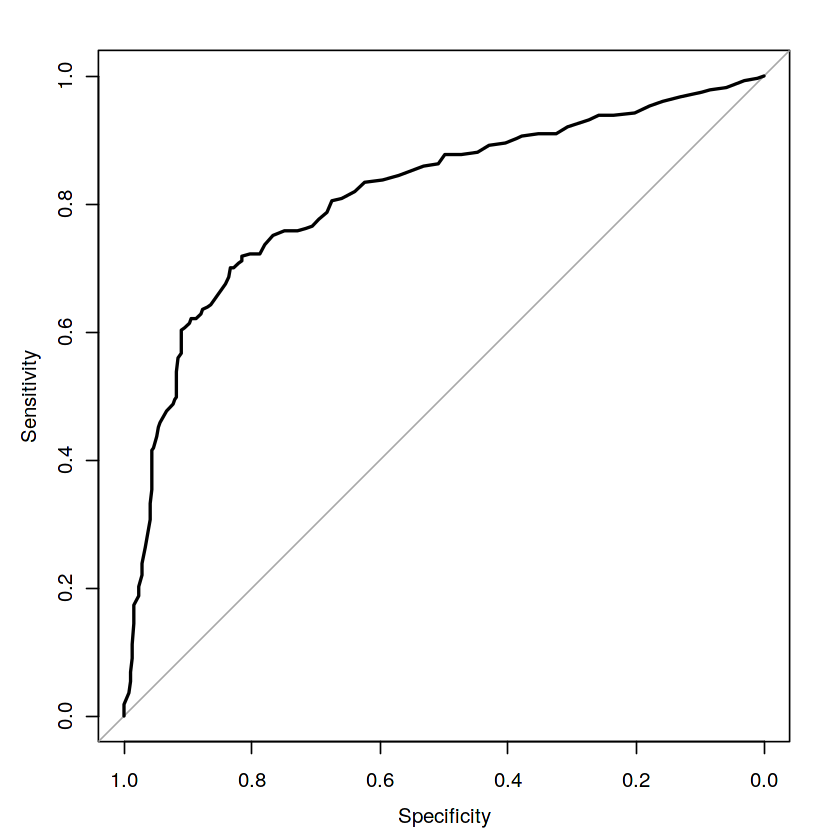

In [72]:
plot(roc(s_train2$store,val.prob_score[,1]))

Next we will build the random forest model on the entire training data set ‘s_train’ & predict the same on test data set ‘s_test’

In [73]:
model_rf_final=randomForest(store~.-Id,data=s_train,mtry=5,ntree=100)

In [74]:
model_rf_final


Call:
 randomForest(formula = store ~ . - Id, data = s_train, mtry = 5,      ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 5

        OOB estimate of  error rate: 22.29%
Confusion matrix:
     0    1 class.error
0 1573  302   0.1610667
1  442 1021   0.3021189

We will now use this model to predict probability score for test data .

In [75]:
test.score=predict(model_rf_final,newdata = s_test,type='prob')[,1]

We can see  my test probability score as under 

In [76]:
test.score

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
0.71 0.84 0.68 0.91 0.73 0.75 0.26 0.83 0.83 0.85 0.37 0.42 0.80 0.11 0.68 0.61 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
0.75 0.79 0.57 0.59 0.56 0.62 0.61 0.47 0.58 0.30 0.19 0.26 0.86 0.58 0.96 0.50 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
0.86 0.77 0.80 0.89 0.85 0.38 0.93 0.43 0.89 0.70 0.99 0.96 0.91 0.85 0.93 0.12 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
0.68 0.62 0.35 0.10 0.11 0.52 0.34 0.19 0.62 0.35 0.82 0.25 0.48 0.78 0.80 0.58 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
0.33 0.85 0.35 0.77 0.57 0.91 0.78 0.30 0.76 0.09 0.04 0.01 0.04 0.00 0.10 0.06 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
0.21 0.04 0.08 0.21 0.01 0.04 0.36 0.50 0.38 0.53 0.71 0.62 0.57 0.28 0.13 0.14 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
0.42 0.28 0.14 0.06 0.64 0.24 0.44 0.13 0.16 0.01 0.10 0.27 0.04 0.15 0.23 0.05 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
0.09 0.71 0.73 0.73 0.23 0.37 0.78 0.12 0.19 0.93 0.48 0.29 0.22 0.36 0.30 0.20 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
0.65 0.96 0.20 0.70 0.15 0.07 0.22 0.41 0.65 0.89 0.72 0.61 0.79 0.54 0.28 0.21 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
0.77 0.85 0.05 0.06 0.82 0.28 0.66 0.21 0.89 0.68 0.39 0.86 0.82 0.18 0.49 0.68 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
0.82 0.09 0.87 0.25 0.76 0.88 0.91 0.92 0.11 0.86 0.77 0.05 0.68 0.73 0.49 0.56 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
0.72 0.93 0.99 0.79 0.24 0.95 0.40 0.76 0.94 0.88 0.93 0.53 0.87 0.14 0.93 0.42 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
0.72 0.33 0.74 0.57 0.45 0.93 0.71 0.94 0.37 0.73 0.85 0.33 0.20 0.03 0.71 0.48 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
0.73 0.40 0.13 0.14 0.89 0.84 0.58 0.85 0.81 0.69 0.42 0.52 0.84 0.74 0.52 0.81 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
0.10 0.42 0.19 0.08 0.85 0.65 0.15 0.46 0.15 0.46 0.56 0.41 0.77 0.72 0.69 0.79 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
0.08 0.52 0.74 0.89 0.14 0.86 0.30 0.75 0.89 0.48 0.30 0.89 0.95 0.73 0.96 0.83 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
0.61 0.95 0.75 0.83 0.83 0.37 0.89 0.74 0.91 0.69 0.83 0.85 0.66 0.72 0.72 0.80 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
0.75 0.55 0.66 0.94 0.78 0.24 0.21 0.90 0.69 0.82 0.84 0.73 0.87 0.53 0.78 0.56 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
0.23 0.88 0.74 0.87 0.63 0.80 0.67 0.79 0.65 0.36 0.44 0.83 0.61 0.29 0.84 0.23 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
0.07 0.42 0.86 0.26 0.36 0.85 0.79 0.82 0.88 0.32 0.83 0.79 0.84 0.05 0.62 0.13 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
0.71 0.84 0.22 0.72 0.82 0.41 0.13 0.75 0.09 0.21 0.82 0.18 0.19 0.46 0.59 0.28 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
0.63 0.11 0.55 0.79 0.51 0.14 0.11 0.27 0.82 0.96 1.00 0.99 0.96 0.92 0.97 1.00 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
0.88 0.97 0.98 0.94 0.94 0.97 0.94 0.97 0.96 0.87 0.14 0.01 0.01 0.03 0.02 0.72 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
0.76 0.89 0.88 0.90 0.94 0.92 0.74 0.98 0.94 0.86 0.86 0.75 0.86 0.80 0.80 0.90 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
0.85 0.82 0.66 0.52 0.87 0.89 0.84

**Variable Importance**

We will run below codes to find out the importance of variable. Higher the mean decrease ginni for any variable better is the variable for prediction. So population is the most important variable.

In [77]:
d=importance(model_rf_final)
d=as.data.frame(d)
d$VariableNames=rownames(d)
d %>% arrange(desc(MeanDecreaseGini))

MeanDecreaseGini,VariableNames
<dbl>,<chr>
266.136784,population
177.661365,sales3
163.080832,sales2
153.120085,sales4
142.722178,sales1
137.830435,sales0
126.216780,country
113.935140,State
67.854908,CouSub


Upon plotting we get a plot like this.

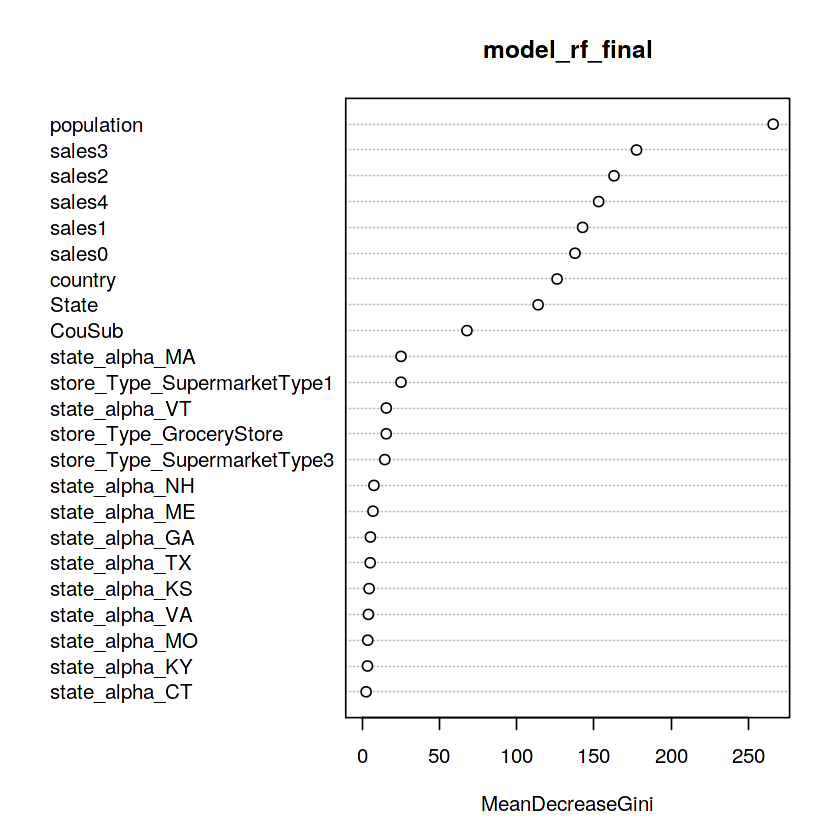

In [78]:
varImpPlot(model_rf_final)